In [3]:
# Script to read in weather forecast data scraped
# from http://weather.gc.ca 
# (See weather.py)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy import stats

In [4]:
# Load data from csv file into dataframe
df = pd.read_csv('weather_data_ca.csv')

In [5]:
# Inspect column labels
df.columns

Index([u'Datetime', u'Loc_code', u'Location', u'Date_string', u'Conditions',
       u'Temperature', u'Pressure', u'Humidity', u'Wind', u'Visibility',
       u'Forecast_high0', u'Forecast_high1', u'Forecast_high2',
       u'Forecast_high3', u'Forecast_high4', u'Forecast_high5',
       u'Forecast_low0', u'Forecast_low1', u'Forecast_low2', u'Forecast_low3',
       u'Forecast_low4', u'Forecast_low5', u'Forecast_precip0',
       u'Forecast_precip1', u'Forecast_precip2', u'Forecast_precip3',
       u'Forecast_precip4', u'Forecast_precip5', u'Forecast_detailed0',
       u'Forecast_detailed1', u'Forecast_detailed2', u'Forecast_detailed3',
       u'Forecast_detailed4', u'Forecast_detailed5', u'Yesterday_max',
       u'Yesterday_min', u'Yesterday_precip'],
      dtype='object')

In [6]:
# How many location codes are there?
loc_codes = df.Loc_code.unique()
print loc_codes, len(loc_codes)

['sk-32' 'nb-29' 'nt-24' 'ab-50' 'on-100' 'on-118' 'bc-85' 'yt-16' 'nu-21'
 'mb-38' 'bc-74' 'qc-133' 'ab-52' 'nl-24' 'ns-19' 'qc-147' 'bc-79'] 17


In [7]:
# Show locations
loc_names = dict(df[['Loc_code', 'Location']].drop_duplicates().values)
loc_names

{'ab-50': 'Edmonton Blatchford',
 'ab-52': "Calgary Int'l Airport",
 'bc-74': "Vancouver Int'l Airport",
 'bc-79': 'Prince George Airport',
 'bc-85': "Victoria Int'l Airport",
 'mb-38': "Winnipeg Richardson Int'l Airport",
 'nb-29': "Fredericton Int'l Airport",
 'nl-24': "St. John's Int'l Airport",
 'ns-19': "Halifax Stanfield Int'l Airport",
 'nt-24': 'Yellowknife Airport',
 'nu-21': 'Iqaluit Airport',
 'on-100': 'Thunder Bay Airport',
 'on-118': "Ottawa Macdonald-Cartier Int'l Airport",
 'qc-133': "Quebec Lesage Int'l Airport",
 'qc-147': "Montral-Trudeau Int'l Airport",
 'sk-32': "Regina Int'l Airport",
 'yt-16': 'Whitehorse Airport'}

In [40]:
loc_code = 'sk-32'
print "Location selected:", loc_names[loc_code]

# Create a dataframe of data from one location
local_data = df[df.Loc_code==loc_code]

Location selected: Regina Int'l Airport


In [41]:
# Show first 5 rows of the dataframe
local_data.head()

,Datetime,Loc_code,Location,Date_string,Conditions,Temperature,Pressure,Humidity,Wind,Visibility,...,Forecast_precip5,Forecast_detailed0,Forecast_detailed1,Forecast_detailed2,Forecast_detailed3,Forecast_detailed4,Forecast_detailed5,Yesterday_max,Yesterday_min,Yesterday_precip
0,2015-08-04 09:01:05.437910,sk-32,Regina Int'l Airport,8:00 AM CST Tuesday 4 August 2015,Mostly Cloudy,17.5,101.6,62,ESE 21 km/h,24,...,0,A mix of sun and cloud. 30 percent chance of s...,A mix of sun and cloud. High 23.,A mix of sun and cloud with 40 percent chance ...,Sunny. High 25.,Sunny. High 27.,Sunny. High 28.,25.9,8.7,0.0
17,2015-08-04 15:01:07.889414,sk-32,Regina Int'l Airport,2:00 PM CST Tuesday 4 August 2015,Mostly Cloudy,27.0,101.4,38,S 23 gust 34 km/h,24,...,0,A mix of sun and cloud. 30 percent chance of s...,Cloudy. High 23.,A mix of sun and cloud with 40 percent chance ...,Sunny. High 25.,Sunny. High 27.,Sunny. High 28.,25.9,8.7,0.0
34,2015-08-04 21:01:08.593721,sk-32,Regina Int'l Airport,8:00 PM CST Tuesday 4 August 2015,Mostly Cloudy,23.3,101.2,49,SE 24 gust 35 km/h,24,...,0,Showers ending in the morning then a mix of su...,Cloudy with 60 percent chance of showers. High...,A mix of sun and cloud with 40 percent chance ...,Sunny. High 25.,Sunny. High 27.,Sunny. High 29.,25.9,8.7,0.0
51,2015-08-05 03:01:07.548682,sk-32,Regina Int'l Airport,2:00 AM CST Wednesday 5 August 2015,Light Rainshower,16.4,101.3,92,SE 19 km/h,24,...,0,Cloudy with 60 percent chance of showers. High...,A mix of sun and cloud with 40 percent chance ...,Sunny. High 25.,Sunny. High 27.,Sunny. High 29.,NaN,27.5,13.1,0.5
68,2015-08-05 09:01:05.799873,sk-32,Regina Int'l Airport,8:21 AM CST Wednesday 5 August 2015,Mostly Cloudy,15.6,101.3,94,SSE 23 km/h,24,...,0,Showers. Risk of a thunderstorm in the afterno...,Cloudy with 40 percent chance of showers. High...,Sunny. High 23.,Sunny. High 27.,Sunny. High 29.,Sunny. High 30.,27.5,13.1,0.5


In [42]:
# Problem: The date is a string.
# Set up a function to convert the date string 
# into a datetime object

def datetime_from_str(s):
    j = s.find('.')
    return datetime.strptime(s[:j], '%Y-%m-%d %H:%M:%S')


# Other functions to convert the datetime
# to more useful parameters like year, month, 
# day etc.

def hr(dt):
    return dt.time().hour

def dy(dt):
    return dt.date().day

def mt(dt):
    return dt.date().month

def yr(dt):
    return dt.date().year

def date(dt):
    return dt.date()

# Use the Pandas DataFrame's apply method to convert
# the strings to a series of datetime objects
datetimes = local_data['Datetime'].apply(datetime_from_str)


In [43]:
# Now insert extra columns for the additional parameters
local_data.insert(local_data.columns.get_loc('Date_string')+1, "Hour", datetimes.apply(hr))
local_data.insert(local_data.columns.get_loc('Date_string')+1, "Day", datetimes.apply(dy))
local_data.insert(local_data.columns.get_loc('Date_string')+1, "Month", datetimes.apply(mt))
local_data.insert(local_data.columns.get_loc('Date_string')+1, "Year", datetimes.apply(yr))
local_data.insert(local_data.columns.get_loc('Datetime')+1, "Date", datetimes.apply(date))

In [44]:
# Show first 5 rows of the dataframe
local_data.head()

,Datetime,Date,Loc_code,Location,Date_string,Year,Month,Day,Hour,Conditions,...,Forecast_precip5,Forecast_detailed0,Forecast_detailed1,Forecast_detailed2,Forecast_detailed3,Forecast_detailed4,Forecast_detailed5,Yesterday_max,Yesterday_min,Yesterday_precip
0,2015-08-04 09:01:05.437910,2015-08-04,sk-32,Regina Int'l Airport,8:00 AM CST Tuesday 4 August 2015,2015,8,4,9,Mostly Cloudy,...,0,A mix of sun and cloud. 30 percent chance of s...,A mix of sun and cloud. High 23.,A mix of sun and cloud with 40 percent chance ...,Sunny. High 25.,Sunny. High 27.,Sunny. High 28.,25.9,8.7,0.0
17,2015-08-04 15:01:07.889414,2015-08-04,sk-32,Regina Int'l Airport,2:00 PM CST Tuesday 4 August 2015,2015,8,4,15,Mostly Cloudy,...,0,A mix of sun and cloud. 30 percent chance of s...,Cloudy. High 23.,A mix of sun and cloud with 40 percent chance ...,Sunny. High 25.,Sunny. High 27.,Sunny. High 28.,25.9,8.7,0.0
34,2015-08-04 21:01:08.593721,2015-08-04,sk-32,Regina Int'l Airport,8:00 PM CST Tuesday 4 August 2015,2015,8,4,21,Mostly Cloudy,...,0,Showers ending in the morning then a mix of su...,Cloudy with 60 percent chance of showers. High...,A mix of sun and cloud with 40 percent chance ...,Sunny. High 25.,Sunny. High 27.,Sunny. High 29.,25.9,8.7,0.0
51,2015-08-05 03:01:07.548682,2015-08-05,sk-32,Regina Int'l Airport,2:00 AM CST Wednesday 5 August 2015,2015,8,5,3,Light Rainshower,...,0,Cloudy with 60 percent chance of showers. High...,A mix of sun and cloud with 40 percent chance ...,Sunny. High 25.,Sunny. High 27.,Sunny. High 29.,NaN,27.5,13.1,0.5
68,2015-08-05 09:01:05.799873,2015-08-05,sk-32,Regina Int'l Airport,8:21 AM CST Wednesday 5 August 2015,2015,8,5,9,Mostly Cloudy,...,0,Showers. Risk of a thunderstorm in the afterno...,Cloudy with 40 percent chance of showers. High...,Sunny. High 23.,Sunny. High 27.,Sunny. High 29.,Sunny. High 30.,27.5,13.1,0.5


In [45]:
# Inspect the Temperature data
local_data[local_data.Hour == 9]['Temperature'].describe()

count    116.000000
mean       2.556897
std        8.140080
min      -15.000000
25%       -2.550000
50%        1.650000
75%        8.825000
max       18.700000
Name: Temperature, dtype: float64

In [46]:
# Create a new indes of just the records that
# were scraped at 9am each day
dates = pd.Series(local_data[(local_data.Hour == 9)]['Date'].values)

start_date = dates.min() - timedelta(1)
end_date = dates.max() + timedelta(6)

index = pd.date_range(start=start_date, end=end_date)
index

DatetimeIndex(['2015-08-03', '2015-08-04', '2015-08-05', '2015-08-06',
               '2015-08-07', '2015-08-08', '2015-08-09', '2015-08-10',
               '2015-08-11', '2015-08-12',
               ...
               '2015-12-10', '2015-12-11', '2015-12-12', '2015-12-13',
               '2015-12-14', '2015-12-15', '2015-12-16', '2015-12-17',
               '2015-12-18', '2015-12-19'],
              dtype='datetime64[ns]', length=139, freq='D')

In [47]:
# Create a new (empty) dataframe to hold the 
# actual values and the previous forecasts of
# that value in the same row

dtype = [
           ("Date", 'datetime64[ns]'), \
           ("Actual", 'f4'), \
           ("Fcast_dm1", 'f4'), \
           ("Fcast_dm2", 'f4')
        ]

columns=['Actual', 'Fcast_dm1', 'Fcast_dm2', 
            'Fcast_dm3', 'Fcast_dm4', 'Fcast_dm5', 'Fcast_dm6']

fcasts = pd.DataFrame(index=index, columns=columns)

fcasts.head()

,Actual,Fcast_dm1,Fcast_dm2,Fcast_dm3,Fcast_dm4,Fcast_dm5,Fcast_dm6
2015-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Go through all the records in local_data, and
# fish out the previous day's actual high, and the 
# forecasts of future highs and then save them
# in the appropriate rows of the new fcasts
# DataFrame.  Sometimes extra empty rows need to be
# added.

blank_row = np.empty(7)
blank_row.fill(np.nan)

for i in local_data[(local_data.Hour == 9)].index:
    
    d = local_data.loc[i]['Date']
    
    dm = d - timedelta(1)
    #if dm not in fcasts.index:
    #    fcasts.loc[dm] = blank_row
    fcasts.loc[dm]['Actual'] = local_data.loc[i]['Yesterday_max']
    
    dp = d + timedelta(1)
    fcasts.loc[dp]['Fcast_dm1'] = local_data.loc[i]['Forecast_high0']
    
    dp = d + timedelta(2)
    fcasts.loc[dp]['Fcast_dm2'] = local_data.loc[i]['Forecast_high1']
    
    dp = d + timedelta(3)
    fcasts.loc[dp]['Fcast_dm3'] = local_data.loc[i]['Forecast_high2']    
    
    dp = d + timedelta(4)
    fcasts.loc[dp]['Fcast_dm4'] = local_data.loc[i]['Forecast_high3']    

    dp = d + timedelta(5)
    fcasts.loc[dp]['Fcast_dm5'] = local_data.loc[i]['Forecast_high4']

    dp = d + timedelta(6)
    fcasts.loc[dp]['Fcast_dm6'] = local_data.loc[i]['Forecast_high5']


In [49]:
fcasts.head()

,Actual,Fcast_dm1,Fcast_dm2,Fcast_dm3,Fcast_dm4,Fcast_dm5,Fcast_dm6
2015-08-03,25.9,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-04,27.5,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-05,27.1,27,NaN,NaN,NaN,NaN,NaN
2015-08-06,18.2,19,23,NaN,NaN,NaN,NaN
2015-08-07,19.8,19,22,24,NaN,NaN,NaN


In [50]:
# Use the notnull() method to find the records in the
# dataframe where all the data is complete
fcasts.notnull().sum(axis=1)

2015-08-03    1
2015-08-04    1
2015-08-05    2
2015-08-06    3
2015-08-07    4
2015-08-08    4
2015-08-09    5
2015-08-10    5
2015-08-11    4
2015-08-12    3
2015-08-13    2
2015-08-14    1
2015-08-15    0
2015-08-16    0
2015-08-17    0
2015-08-18    0
2015-08-19    0
2015-08-20    0
2015-08-21    0
2015-08-22    1
2015-08-23    1
2015-08-24    1
2015-08-25    2
2015-08-26    3
2015-08-27    3
2015-08-28    4
2015-08-29    5
2015-08-30    5
2015-08-31    5
2015-09-01    6
             ..
2015-11-20    7
2015-11-21    7
2015-11-22    7
2015-11-23    7
2015-11-24    7
2015-11-25    7
2015-11-26    7
2015-11-27    7
2015-11-28    7
2015-11-29    7
2015-11-30    7
2015-12-01    7
2015-12-02    7
2015-12-03    7
2015-12-04    7
2015-12-05    7
2015-12-06    7
2015-12-07    7
2015-12-08    7
2015-12-09    7
2015-12-10    7
2015-12-11    7
2015-12-12    7
2015-12-13    6
2015-12-14    6
2015-12-15    5
2015-12-16    4
2015-12-17    3
2015-12-18    2
2015-12-19    1
Freq: D, dtype: int64

In [51]:
# Take only the records where there is an actual
fcasts = fcasts[fcasts.Actual.notnull()].sort_index()
fcasts[0:10]

,Actual,Fcast_dm1,Fcast_dm2,Fcast_dm3,Fcast_dm4,Fcast_dm5,Fcast_dm6
2015-08-03,25.9,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-04,27.5,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-05,27.1,27,NaN,NaN,NaN,NaN,NaN
2015-08-06,18.2,19,23,NaN,NaN,NaN,NaN
2015-08-07,19.8,19,22,24,NaN,NaN,NaN
2015-08-22,15.4,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-23,17.6,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-26,25.9,NaN,27,28,NaN,NaN,NaN
2015-08-27,28.2,NaN,NaN,28,26,NaN,NaN
2015-08-28,27.4,28,NaN,NaN,29,26,NaN


In [52]:
# Range of actual highs
fcasts['Actual'].min(), fcasts['Actual'].max()

(-10.300000000000001, 34.399999999999999)

In [53]:
fcasts[fcasts.Actual == fcasts['Actual'].max()]

,Actual,Fcast_dm1,Fcast_dm2,Fcast_dm3,Fcast_dm4,Fcast_dm5,Fcast_dm6
2015-09-02,34.4,30,28,24,24,24,23


In [54]:
# Range of 6-day previous forecast highs
fcasts['Fcast_dm6'].min(), fcasts['Fcast_dm6'].max()

(-16.0, 26.0)

In [55]:
# Prepare x and y data for plotting
x = fcasts['Actual']
y1 = fcasts['Fcast_dm1']

In [56]:
x.head()

2015-08-03    25.9
2015-08-04    27.5
2015-08-05    27.1
2015-08-06    18.2
2015-08-07    19.8
Name: Actual, dtype: object

In [57]:
xmin = int(x.min()/5)*5
xmax = int(x.max()/5 + 1)*5
xmin, xmax

(-10, 35)

In [58]:
ymin = int(y1.min()/5)*5
ymax = int(y1.max()/5 + 1)*5
ymin, ymax

(-10, 35)

In [59]:
lmin, lmax = min(xmin, ymin), max(xmax, ymax)
lmin, lmax

(-10, 35)

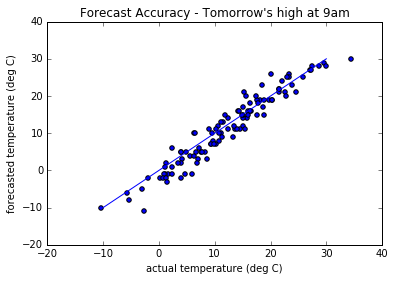

In [60]:
# Select the option of inline plots
%matplotlib inline

plt.title("Forecast Accuracy - Tomorrow's high at 9am")

plt.scatter(x, y1)

# Add the straight line through the
# origin (y=x)
t = np.arange(lmin, lmax, 5)
plt.plot(t, t)

plt.xlabel('actual temperature (deg C)')
plt.ylabel('forecasted temperature (deg C)')

plt.show()

In [61]:
# Create the y data for the other 
# forecasts
y2 = fcasts['Fcast_dm2']
y3 = fcasts['Fcast_dm3']
y4 = fcasts['Fcast_dm4']
y5 = fcasts['Fcast_dm5']
y6 = fcasts['Fcast_dm6']

In [62]:
y_all = np.concatenate((y1.values, y2.values, y3.values, y4.values, y5.values, y6.values), axis=0)
ymin = int(y_all.min()/5)*5
ymax = int(y_all.max()/5 + 1)*5
ymin, ymax

(-15, 25)

In [63]:
ymin = int(y1.min()/5)*5
ymax = int(y1.max()/5)*5

In [64]:
lmin, lmax = min(xmin, ymin), max(xmax, ymax)
lmin, lmax

(-10, 35)

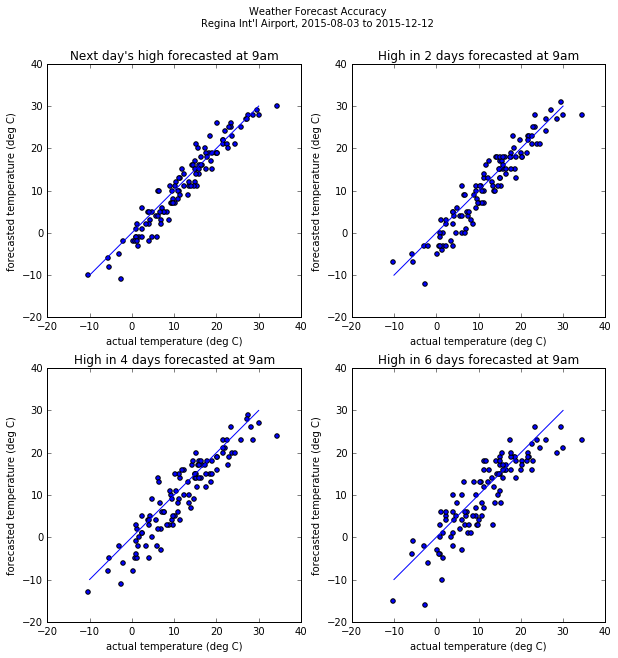

In [65]:
# Multiple plots in one figure

details = loc_names[loc_code] + ", " + str(start_date) + " to " + str(end_date - timedelta(7))

fig = plt.figure(1)
fig.set_size_inches(10, 10)
plt.suptitle('Weather Forecast Accuracy\n' + details)

xlabel = 'actual temperature (deg C)'
ylabel = 'forecasted temperature (deg C)'

#-----------------------

fig.add_subplot(221)

plt.title("Next day's high forecasted at 9am")

plt.scatter(x, y1)

t = np.arange(lmin, lmax, 5)
plt.plot(t, t)

plt.xlabel(xlabel)
plt.ylabel(ylabel)


#-----------------------

fig.add_subplot(222)

plt.title("High in 2 days forecasted at 9am")

plt.scatter(x, y2)

t = np.arange(lmin, lmax, 5)
plt.plot(t, t)

plt.xlabel(xlabel)
plt.ylabel(ylabel)



#-----------------------

fig.add_subplot(223)

plt.title("High in 4 days forecasted at 9am")

plt.scatter(x, y4)

t = np.arange(lmin, lmax, 5)
plt.plot(t, t)

plt.xlabel(xlabel)
plt.ylabel(ylabel)


#-----------------------

fig.add_subplot(224)

plt.title("High in 6 days forecasted at 9am")

plt.scatter(x, y6)

t = np.arange(lmin, lmax, 5)
plt.plot(t, t)

plt.xlabel(xlabel)
plt.ylabel(ylabel)


plt.show()

In [66]:
# Save figure to pdf file

filename = 'Weather forecast accuracy_' + loc_code + '.pdf'
fig.savefig(filename)


In [67]:
# Now let's calculate the variances between the
# forecasts and the actuals

fcasts['Var_dm1'] = fcasts.Fcast_dm1 - fcasts.Actual
fcasts['Var_dm2'] = fcasts.Fcast_dm2 - fcasts.Actual
fcasts['Var_dm3'] = fcasts.Fcast_dm3 - fcasts.Actual
fcasts['Var_dm4'] = fcasts.Fcast_dm4 - fcasts.Actual
fcasts['Var_dm5'] = fcasts.Fcast_dm5 - fcasts.Actual
fcasts['Var_dm6'] = fcasts.Fcast_dm6 - fcasts.Actual

fcasts.head()

,Actual,Fcast_dm1,Fcast_dm2,Fcast_dm3,Fcast_dm4,Fcast_dm5,Fcast_dm6,Var_dm1,Var_dm2,Var_dm3,Var_dm4,Var_dm5,Var_dm6
2015-08-03,25.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-04,27.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-05,27.1,27,NaN,NaN,NaN,NaN,NaN,-0.1,NaN,NaN,NaN,NaN,NaN
2015-08-06,18.2,19,23,NaN,NaN,NaN,NaN,0.8,4.8,NaN,NaN,NaN,NaN
2015-08-07,19.8,19,22,24,NaN,NaN,NaN,-0.8,2.2,4.2,NaN,NaN,NaN


In [36]:
# Mean and standard deviation of the variance

var_results = pd.DataFrame(columns=("Mean", "StdDev"))

for i, d in enumerate([fcasts.Var_dm1, fcasts.Var_dm2, fcasts.Var_dm3, fcasts.Var_dm4, fcasts.Var_dm5, fcasts.Var_dm6]):
    var_results.loc[i+1] = [d.mean(), d.std()]

var_results

,Mean,StdDev
1,-1.063636,2.083078
2,-0.491743,2.491806
3,-0.799074,3.059824
4,-1.095283,3.466695
5,-1.095238,3.375659
6,-1.048077,3.988089


In [37]:
#All_results = dict()

In [38]:
All_results[loc_code] = var_results

NameError: name 'All_results' is not defined

In [39]:
All_results

NameError: name 'All_results' is not defined

In [821]:
len(All_results)

16

In [754]:
All_results['sk-32']

,Mean,StdDev
1,-0.401136,2.468118
2,-0.433333,2.628629
3,-0.640698,2.944801
4,-1.100000,3.440930
5,-0.944578,3.724450
6,-0.734146,4.068070
